<a href="https://colab.research.google.com/github/mjfoster1313/Matts-Repo/blob/main/15_15_week2hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 15.5 Case Study: Multiple Linear Regression with the California Housing Dataset
* [**California Housing dataset**](http://lib.stat.cmu.edu/datasets) bundled with scikit-learn
* **Larger real-world dataset**
    **20,640 samples**, each with **eight numerical features**
	* Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297. Submitted to the StatLib Datasets Archive by Kelley Pace (kpace@unix1.sncc.lsu.edu). [9/Nov/99].
* Perform **multiple linear regression** using **all eight numerical features**
    * Make **more sophisticated housing price predictions** than if we were to use only a **single feature** or a **subset of the features**
* **`LinearRegression`** estimator performs **multiple linear regression** by default

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.5.1 Loading the Dataset (1 of 3)
* According to the California Housing Prices dataset’s description in scikit-learn
> "This dataset was **derived from the 1990 U.S. census**, using **one row per census block group**.  
>  
> "A **block group** is the **smallest geographical unit** for which the U.S. Census Bureau publishes sample data (typically has a **population of 600 to 3,000 people**)."

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.5.1 Loading the Dataset (2 of 3)
* The dataset has **20,640 samples**—**one per block group**—with **eight features** each:
	* **median income**—in tens of thousands, so 8.37 would represent $83,700
	* **median house age**—in the dataset, the maximum value for this feature is 52
	* **average number of rooms**
	* **average number of bedrooms**
	* **block population**
	* **average house occupancy**
	* **house block latitude**
	* **house block longitude**

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.5.1 Loading the Dataset (3 of 3)
* **Target** &mdash; **median house value** in hundreds of thousands, so 3.55 would represent \$355,000
    * **Maximum** for this feature is**&nbsp;5** for **\$500,000**
* Reasonable to expect **more bedrooms**, **more rooms** or **higher income** would mean **higher house value**
* **Combine all numeric features to make predictions**
    * More likely to get **more accurate predictions** than with simple linear regression

In [50]:
%matplotlib inline
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
diabetes = load_diabetes()  # Bunch object

### Displaying the Dataset’s Description

In [52]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

* Confirm number of **samples/features**, number of **targets**, **feature names**

In [53]:
diabetes.data.shape

(442, 10)

In [54]:
diabetes.target.shape

(442,)

In [55]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## 15.5.2 Exploring the Data with a Pandas

In [78]:
import pandas as pd
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

## 15.5.2 Exploring the Data with a Pandas (cont.)

In [79]:
diabetes_df.head()  # peek at first 5 rows

,age,...,target
0,0.04,...,151.00
1,-0.00,...,75.00
2,0.09,...,141.00
3,-0.09,...,206.00
4,0.01,...,135.00


## 15.5.2 Exploring the Data with a Pandas `DataFrame` (cont.)
* Calculate **`DataFrame`’s summary statistics**
* Median income and house values are from 1990 and are **significantly higher today**
* Output is **left-to-right scrollable in Jupyter** if it does not fit in your screen width

In [80]:
diabetes_df.describe()

,age,...,target
count,442.00,...,442.00
mean,-0.00,...,152.13
std,0.05,...,77.09
min,-0.11,...,25.00
25%,-0.04,...,87.00
50%,0.01,...,140.50
75%,0.04,...,211.50
max,0.11,...,346.00


In [82]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

* Display **scatter plots** of several **features**
* Each shows **feature** on **x-axis** and **median home value** on **y-axis**

In [83]:
import matplotlib.pyplot as plt

In [64]:
import seaborn as sns

In [92]:
sns.set()
sns.set_style("ticks", {
    'axes.grid': True,
    'grid.color': '.9',
    'grid.linestyle': u'-',
    'figure.facecolor': 'white', # axes
})
sns.set_context("notebook")

<Axes: xlabel='age', ylabel='target'>

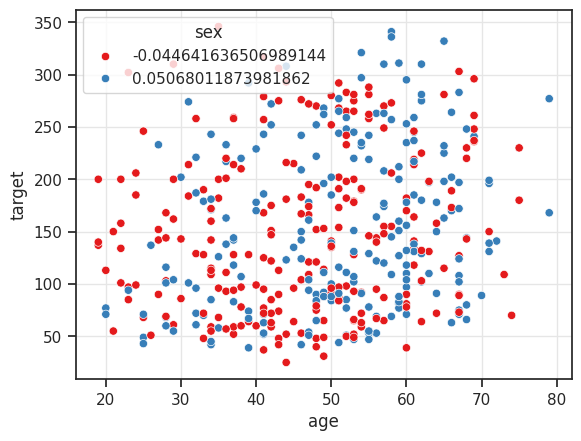

In [100]:
  sns.scatterplot(x=df.age, y=diabetes_df.target, hue=diabetes_df.sex, palette='Set1')

<!-- ![California Housing Dataset scatterplot of Median House Value vs. Median Income](./ch14images/medincome.png "California Housing Dataset scatterplot of Median House Value vs. Median Income")
 ![California Housing Dataset scatterplot of Median House Value vs. House Age](./ch14images/houseage.png "California Housing Dataset scatterplot of Median House Value vs. House Age")
 ![California Housing Dataset scatterplot of Median House Value vs. Average Rooms](./ch14images/averooms.png "California Housing Dataset scatterplot of Median House Value vs. Average Rooms")
 ![California Housing Dataset scatterplot of Median House Value vs. Average Bedrooms](./ch14images/avebedrooms.png "California Housing Dataset scatterplot of Median House Value vs. Average Bedrooms")
 ![California Housing Dataset scatterplot of Median House Value vs. Population](./ch14images/population.png "California Housing Dataset scatterplot of Median House Value vs. Population")
 ![California Housing Dataset scatterplot of Median House Value vs. Average Occupancy](./ch14images/aveoccupancy.png "California Housing Dataset scatterplot of Median House Value vs. Average Occupancy")
 ![California Housing Dataset scatterplot of Median House Value vs. Lattitude](./ch14images/lattitude.png "California Housing Dataset scatterplot of Median House Value vs. Lattitude")
 ![California Housing Dataset scatterplot of Median House Value vs. Longitude](./ch14images/longitude.png "California Housing Dataset scatterplot of Median House Value vs. Longitude")<hr style="height:2px; border:none; color:black; background-color:black;"> -->

## 15.5.4 Splitting the Data for Training and Testing Using `train_test_split`  

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=11)

In [103]:
X_train.shape

(331, 10)

In [104]:
X_test.shape

(111, 10)

## 15.5.5 Training the Model
* **`LinearRegression`** tries to use **all** features in a dataset’s `data` array
    * **error** if any features are **categorical**  
    * Categorical data must be preprocessed into numerical data or excluded
* **Scikit-learn’s bundled datasets** are already in the **correct format** for training

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
linear_regression = LinearRegression()

In [107]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

## 15.5.5 Training the Model (cont.)
* **Separate coefficients** for each feature (stored in `coeff_`) and **one intercept** (stored in `intercept_`)
    * **Positive coefficients** &mdash; median house value **increases** as feature value **increases**
    * **Negative coefficients** &mdash; median house value **decreases** as feature value **increases**
    * **HouseAge**, **AveOccup** and **Population** are **close to zero**, so these apparently have little to no affect on **median house value**

In [108]:
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

       age: -60.21981405677291
       sex: -266.45705232203574
       bmi: 523.0634112596993
        bp: 310.5134699670048
        s1: -336.1614738106944
        s2: 137.3392923842451
        s3: -131.13923283453653
        s4: -1.1492348017315557
        s5: 622.3286855688128
        s6: 60.466457691682535


In [109]:
linear_regression.intercept_

152.22822762230342

## 15.5.5 Training the Model (cont.)
* Can use coefficient values in following equation to **make predictions**:

\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}

* <em>m</em><sub>1</sub>, <em>m</em><sub>2</sub>, …, <em>m</em><sub><em>n</em></sub> are the **feature coefficients**
* <em>b</em> is the **intercept**
* <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub>, …, <em>x</em><sub><em>n</em></sub> are **feature values** (the **independent variables**)
* <em>y</em> is the **predicted value** (the **dependent variable**)
   

## 15.5.6 Testing the Model
* Use the estimator’s `predict` method

In [110]:
predicted = linear_regression.predict(X_test)

In [111]:
expected = y_test

In [112]:
predicted[:5]  # first 5 predictions

array([115.46474836,  83.4585369 , 160.77727376, 187.65710274,
        72.72122197])

In [113]:
expected[:5]   # first five targets

array([ 79.,  55., 109., 178.,  39.])

## 15.5.6 Testing the Model with the Estimator’s `predict `Method (cont.)
* In **classification**, **predictions** were **distinct classes** that **matched existing classes** in the dataset
* In **regression**, it’s **tough to get exact predictions**, because you have **continuous outputs**
    * Every possible value of <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub> … <em>x</em><sub><em>n</em></sub> in the following calculation predicts a value

\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}


## 15.5.7 Visualizing the Expected vs. Predicted Prices
* Create a `DataFrame` containing columns for the expected and predicted values:

In [114]:
df = pd.DataFrame()

In [115]:
df['Expected'] = pd.Series(expected)

In [116]:
df['Predicted'] = pd.Series(predicted)

## 15.5.7 Visualizing the Expected vs. Predicted Prices (cont.)
* Plot the data as a scatter plot with the **expected (target) prices** along the x-axis and the **predicted prices** along the **y**-axis:

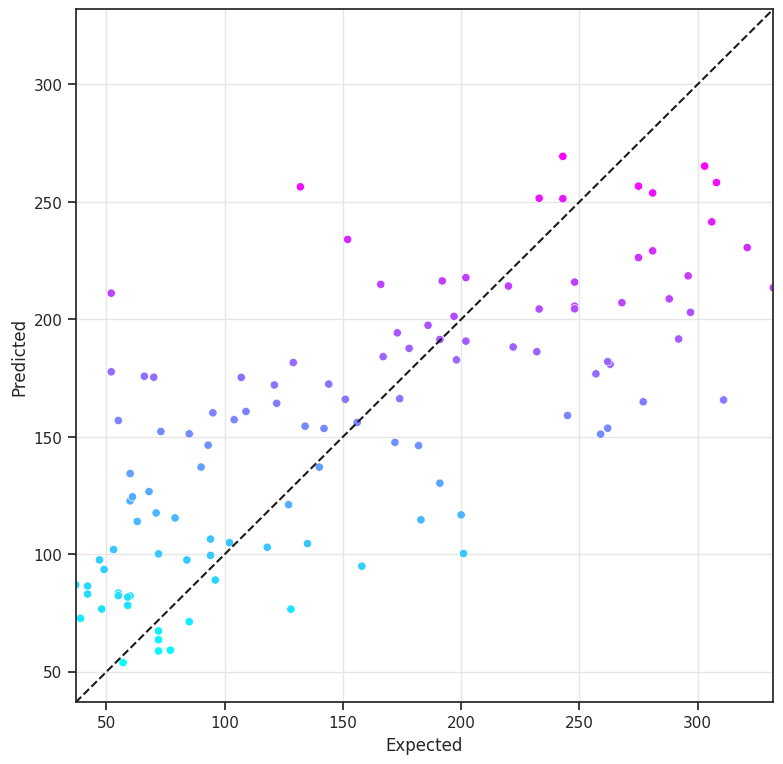

In [117]:
figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
    hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

## 15.5.7 Visualizing the Expected vs. Predicted Prices (cont.)
* Set the **<em>x</em>**- and **<em>y</em>**-axes’ limits to use the same scale along both axes:
* Plot a line that represents **perfect predictions** (this is **not** a regression line).
    * The call to **`plot`** displays a line between the points representing the lower-left corner of the graph (`start, start`) and the upper-right corner of the graph (`end, end`).
    * The third argument (`'k--'`) indicates the line’s style.
    * The letter `k` represents the color black, and the `--` indicates that plot should draw a dashed line:
* If every predicted value were to match the expected value, then all the dots would be plotted along the dashed line.
* Appears that as the expected median house value increases, more of the predicted values fall below the line.
* So the model **seems to predict** lower median house values as the **expected** median house value increases.


## 15.5.8 Regression Model Metrics
* **Metrics for regression estimators** include **coefficient of determination** (**$R^{2}$ score**; 0.0-1.0)
    * **1.0** &mdash; estimator **perfectly predicts** the **dependent variable’s value**, given independent variables' values
    * **0.0** &mdash; **model cannot make predictions with any accuracy**, given independent variables’ values
* Calculate with arrays representing the **expected** and **predicted results**

In [118]:
from sklearn import metrics

In [119]:
metrics.r2_score(expected, predicted)

0.5322429620529407

## 15.5.9 Choosing the Best Model
* **Try several estimators** to determine whether any **produces better results** than `LinearRegression`
* [Information about estimators used here](https://scikit-learn.org/stable/modules/linear_model.html)

In [120]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [121]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

## 15.5.9 Choosing the Best Model (cont.)
* Run the estimators using **k-fold cross-validation**
* **`cross_val_score` argument `scoring='r2'`** &mdash; report **$R^{2}$ scores** for **each fold**
    * **1.0 is best**, so **`LinearRegression`** and **`Ridge`** appear to be **best models** for this dataset

In [123]:
from sklearn.model_selection import KFold, cross_val_score

In [124]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
        X=diabetes.data, y=diabetes.target, cv=kfold,
        scoring='r2')
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421


------
&copy;1992&ndash;2020 by Pearson Education, Inc. All Rights Reserved. This content is based on Chapter 5 of the book [**Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud**](https://amzn.to/2VvdnxE).

DISCLAIMER: The authors and publisher of this book have used their
best efforts in preparing the book. These efforts include the
development, research, and testing of the theories and programs
to determine their effectiveness. The authors and publisher make
no warranty of any kind, expressed or implied, with regard to these
programs or to the documentation contained in these books. The authors
and publisher shall not be liable in any event for incidental or
consequential damages in connection with, or arising out of, the
furnishing, performance, or use of these programs.                  